In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Travel Insurance Prediction

## Preprocessing

In [2]:
travel_insurance_df = pd.read_csv('TravelInsurancePrediction.csv')
travel_insurance_df.head()
travel_insurance_df = travel_insurance_df.drop('Unnamed: 0', axis=1)

### Encoding Categorical Data

In [3]:
label_encoder = LabelEncoder()

travel_insurance_df['Employment Type'] = label_encoder.fit_transform(travel_insurance_df['Employment Type'])
travel_insurance_df['GraduateOrNot'] = label_encoder.fit_transform(travel_insurance_df['GraduateOrNot'])
travel_insurance_df['FrequentFlyer'] = label_encoder.fit_transform(travel_insurance_df['FrequentFlyer'])
travel_insurance_df['EverTravelledAbroad'] = label_encoder.fit_transform(travel_insurance_df['EverTravelledAbroad'])

travel_insurance_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


### Normalizing Data

In [4]:
scaled_clustering = travel_insurance_df.copy()
travel_insurance_df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [5]:
scaler = StandardScaler()
scaled_clustering[['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome','FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', \
       'EverTravelledAbroad']] = scaler.fit_transform(scaled_clustering[['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', \
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']])

scaled_clustering.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0.463430,-1.576694,0.417552,-1.414061,0.774964,1.612339,-0.515369,-0.486277,0
1,0.463430,0.634238,0.417552,0.842012,1.396373,-0.620217,-0.515369,-0.486277,0
2,1.493446,0.634238,0.417552,-1.148641,-0.467855,1.612339,-0.515369,-0.486277,1
3,-0.566587,0.634238,0.417552,-0.617800,-1.089265,1.612339,-0.515369,-0.486277,0
4,-0.566587,0.634238,0.417552,-0.617800,2.017783,1.612339,1.940358,-0.486277,0


### Splitting Data

In [6]:
X = travel_insurance_df.drop(['TravelInsurance'], axis = 1).values
y = travel_insurance_df['TravelInsurance'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Clustering Through Decision Trees

### Making Predictions

In [7]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7939698492462312

### Results Visualization

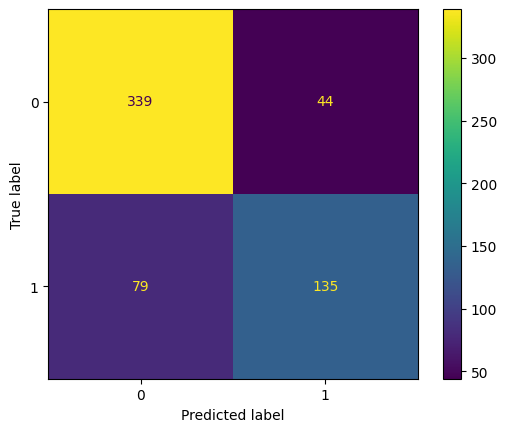

In [8]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

## Clustering Through KNN

### Making Predictions

In [9]:
knn = KNeighborsClassifier(metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8056951423785594

### Visualizing Results

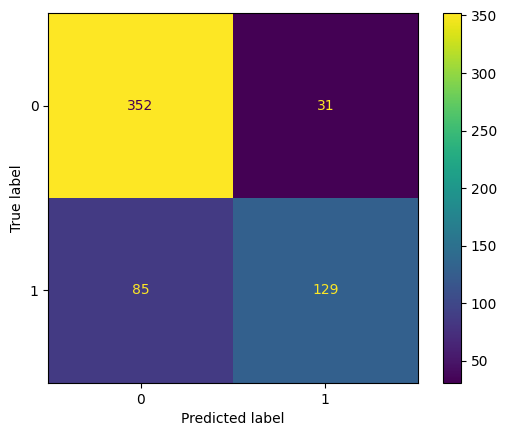

In [10]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

## Clustering Through K-Means

### Testing Number of Clusters

In [11]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
    kmeans.fit(scaled_clustering)
    distortions.append(kmeans.inertia_)

min_distortion = min(distortions)

best_num_clusters = distortions.index(min_distortion)

print('The best number of clusters among the 10 quantities tested is', best_num_clusters,end='.')

The best number of clusters among the 10 quantities tested is 9.

### Visualizing Results

In [12]:
cluster = KMeans(n_clusters=best_num_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
kmeans.fit(scaled_clustering[['AnnualIncome','FrequentFlyer']])

cluster_assignments = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

graf1 = px.scatter(x = scaled_clustering.loc[:,'AnnualIncome'], y = scaled_clustering.loc[:,'FrequentFlyer'], color=cluster_assignments)
graf2 = px.scatter(x = cluster_centers[:,0], y = cluster_centers[:,1], size = [10 for _ in range(10)])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=300,title_text='K-Means Clustering')
graf3.update_xaxes(title = 'AnnualIncome')
graf3.update_yaxes(title = 'FrequentFlyer')
graf3.show()